Install Convokit

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Install relevant libraries and dependencies
# !pip install convokit
# !pip install readability
# !pip install hatesonar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 883 kB 12.8 MB/s 


In [2]:
!pip install ipynb

In [3]:
%cd C:\Sagar Study\ML and Learning\CP Sem-8\Project-2-Overall\NLUProject\models

C:\Sagar Study\ML and Learning\CP Sem-8\Project-2-Overall\NLUProject\models


In [ ]:
# Import libraries
import re
import sys
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from classifier_bert import clean
# Set up the system-path variable
# sys.path.append('NLUProject')

# Importing the readability metric for scoring the comment/text complexity 
import readability 

sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)


# Hate Speech Detection
# from hatesonar import Sonar

# Convokit Corpus
# from convokit import Corpus, download

# Import Data Clean function 
# from models import classifier_bert as classifier

Dataset already exists at C:\Users\User\.convokit\downloads\reddit-coarse-discourse-corpus


Shit I planned out a whole week's worth of break to play BF3 nonstop, then a 1 night CS project turned into a 2 night CS project... and a 4 night CS project... and a 7 day/night CS project...

I swear I've put like 90 hours into this thing and I'm not done yet. 
----------------------------------------
Wasn't that U2? I intend to edit, then steal this joke.
----------------------------------------
I was watching the keynote on my PC at work and one of my co-workers sarcastically yelled out NERD! to me. 


----------------------------------------
I wasn't alive at that time as well. coincidence? i think not. 
----------------------------------------
Melon balls. My adv
----------------------------------------
Stress
1
5
Index(['announcement', 'elaboration', 'humor', 'appreciation', 'question',
       'answer', 'agreement', 'negativereaction', 'disagreement', 'other'],
      dtype='object')
Loading BERT tokenizer...


Token indices sequence length is longer than the specified maximum sequence length for this model (549 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  1996


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


In [8]:
#Download the HATE-SPEECH corpus
corpus = Corpus(filename=download("diplomacy-corpus"))

Dataset already exists at C:\Users\User\.convokit\downloads\diplomacy-corpus


In [7]:
#Quick Stats
corpus.print_summary_stats()

Number of Speakers: 83
Number of Utterances: 17289
Number of Conversations: 246


In [9]:
data = corpus.get_utterances_dataframe()
data.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.speaker_intention,meta.receiver_perception,meta.receiver,meta.absolute_message_index,meta.relative_message_index,meta.year,meta.game_score,meta.game_score_delta,meta.deception_quadrant,vectors
id,,,,,,,,,,,,,,,
Game1-italy-germany-0,74,Germany!\n\nJust the person I want to speak wi...,italy-Game1,None,Game1-italy-germany,Truth,Truth,germany-Game1,74,0,1901,3,0,Straightforward,[]
Game1-italy-germany-1,76,"You've whet my appetite, Italy. What's the sug...",germany-Game1,Game1-italy-germany-0,Game1-italy-germany,Truth,Truth,italy-Game1,76,1,1901,3,0,Straightforward,[]
Game1-italy-germany-2,86,👍,italy-Game1,Game1-italy-germany-1,Game1-italy-germany,Truth,Truth,germany-Game1,86,2,1901,3,0,Straightforward,[]
Game1-italy-germany-3,87,It seems like there are a lot of ways that cou...,germany-Game1,Game1-italy-germany-2,Game1-italy-germany,Truth,Truth,italy-Game1,87,3,1901,3,0,Straightforward,[]
Game1-italy-germany-4,89,"Yeah, I can’t say I’ve tried it and it works, ...",italy-Game1,Game1-italy-germany-3,Game1-italy-germany,Truth,None,germany-Game1,89,4,1901,3,0,Unknown,[]


In [33]:
# The Reddit Clean Function 
def clean(text, newline=True, quote=True, bullet_point=True,dates=True,
          link=True, strikethrough=True, spoiler=True, heading=True, emoji=True, emoticon=True, contraction=True):
    
    # Newlines we dont need - only 
    if newline:
        text = re.sub(r'\n+', ' ', text)
        # Remove the many " " that we replaced in the last steo
        text = text.strip()
        text = re.sub(r'\s\s+', ' ', text)

    # > are for the qouted texts from the main comment or the reply
    if quote:
        text = re.sub(r'>', '', text)

    # Bullet points/asterisk are used for markdown like - bold/italic - Could create trouble in parsing? idk
    if bullet_point:
        text = re.sub(r'\*', '', text)
        text = re.sub('&amp;#x200B;', '', text)

    # []() Link format then we remove both the tag/placeholder and the link
    if link:
        text = re.sub(r"http\S+", '', text)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # Strikethrough
    if strikethrough:
        text = re.sub('~', '', text)

    # Spoiler, which is used with < less-than (Preserves the text)
    if spoiler:
        text = re.sub('&lt;', '', text)
        text = re.sub(r'!(.*?)!', r'\1', text)

    # Heading to be removed as there are these markdown style features in reddit too
    if heading:
        text = re.sub('#', '', text)
        
    if emoji:
    # Implement the emoji scheme here. 
    # Makes more sense for the node feature but might as well import that function here if ready    
        pass
    if dates:
        text = re.sub(r'(\d+/\d+/\d+)', '', text)
    if emoticon:
    # Implement the emoticon scheme here. 
    # Makes more sense for the node feature but might as well import that function here if ready 
        pass
    
    #Needs to be the last step in the process
    # if contractions:
        # text = contractions.fix(text)
    #print("Running")    
    return text

# Calculate Readability Metrics 
# def calc_Kincaid(text):
#     read_Kincaid = readability.getmeasures((text), lang='en')['readability grades']['Kincaid']
#     return read_Kincaid
    
# def calc_GF(text):
#     read_GF = readability.getmeasures((text), lang='en')['readability grades']['GunningFogIndex']
#     return read_GF

# Data Analysis

1. Performing analysis and plotting variables that have been provided in the paper. 
2. Reproduce them
3. Do study of your own - Follow the plots

In [18]:
# Perform Data Cleaning 
data['clean_text'] = data['text'].apply(lambda text: clean(text))
data['clean_text']

id
Game1-italy-germany-0     Germany! Just the person I want to speak with....
Game1-italy-germany-1     You've whet my appetite, Italy. What's the sug...
Game1-italy-germany-2                                                     👍
Game1-italy-germany-3     It seems like there are a lot of ways that cou...
Game1-italy-germany-4     Yeah, I can’t say I’ve tried it and it works, ...
                                                ...                        
Game9-turkey-france-29                                             Mm I see
Game9-turkey-france-30      Well, just putting the option out there I guess
Game9-turkey-france-31                      you have anything else in mind?
Game9-turkey-france-32    I guess I'd also be happy to support you into ...
Game9-turkey-france-33    That would be interesting, but I think I want ...
Name: clean_text, Length: 17289, dtype: object

In [37]:
# Compute readability metrics of the data 
data['readability'] = readability.getmeasures(data['clean_text'], lang='en')['readability grades']['Kincaid']
data['readability_GF'] = readability.getmeasures(data['clean_text'], lang='en')['readability grades']['GunningFogIndex']

# Compute average Kincaid Grade level
print(data['readability'].mean())

# Compute average Gunning Fog Index Level 
print(data['readability_GF'].mean())

6.1491177116438065
10.614771051101993


Source - https://www.wyliecomm.com/2021/11/measure-reading-levels-with-readability-indexes/

**The value of Kincaid Grade level of 6.1 and GF Index around 10.6 means that the text is on the easier side**
**These values suggest that the overall readability of the text is permissible for a sophomore. Hence it can be understood by most people**

In [43]:
# Computing these scores where there is an occurence of deception 
data_decep = data[data['meta.speaker_intention']=='Lie']
data_decep = data_decep[data_decep['meta.receiver_perception']=='Truth']

# data.drop(['readability_GF'], axis=1, inplace=True)

# Compute readability metrics of the new data 
print(data_decep['readability'].mean())
print(data_decep['readability_gf'].mean())

# No observable change in values 

6.1491177116444025
10.614771051105695


In [46]:
# Compute average text length and compare with the length of deceptive text 
data['sent_length'] = data['clean_text'].apply(lambda text: len(text))
data_decep['sent_length'] = data_decep['clean_text'].apply(lambda text: len(text))

# Print average lengths
print(data['sent_length'].mean())
print(data_decep['sent_length'].mean())

104.71085661403204
154.37771345875544


**Deceptive texts are usually longer as they consist of more positive connotations, phrases and clauses than normal text. Also, it consists of more verbose to convince or appease the listener.**

In [15]:
data['readability'].value_counts()

6.148031    17289
Name: readability, dtype: int64

In [ ]:
data.iloc[25, ]

timestamp                                                                    341
text                           How are things going with England? I think tha...
speaker                                                              italy-Game1
reply_to                                                  Game1-italy-germany-24
conversation_id                                              Game1-italy-germany
meta.speaker_intention                                                     Truth
meta.receiver_perception                                                   Truth
meta.receiver                                                      germany-Game1
meta.absolute_message_index                                                  341
meta.relative_message_index                                                   25
meta.year                                                                   1901
meta.game_score                                                                4
meta.game_score_delta       

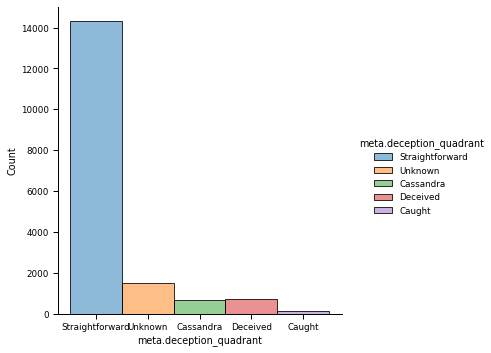

In [ ]:
#Study the distribution of deception quadrant
sns.displot(data.dropna(axis=0, how='all'), x='meta.deception_quadrant', hue='meta.deception_quadrant')
plt.show()

In [ ]:
# EDA for all games
# Message Count
print(f"Message Count - {data.shape[0]}")

# Actual Lie Count
data_act_lie = data[(data['meta.speaker_intention']=='Lie')]
print(f"Actual Lie Count - {data_act_lie.shape[0]}")

#Suspected Lie Count
data_sus = data[data['meta.speaker_intention'] == 'Truth']
data_sus_lie = data_sus[data_sus['meta.receiver_perception'] == 'Lie']
print(f"Suspected Lie Count - {data_sus_lie.shape[0]}")

#Average Word Count
data_length=data['text'].apply(lambda sent : len(sent))
print(f"Average Word Count - {(data_length.values.sum())/len(data):.2f}")

Message Count - 17289
Actual Lie Count - 887
Suspected Lie Count - 667
Average Word Count - 105.08


In [ ]:
#A lie-lie statement
data_caught = data_act_lie[data_act_lie['meta.receiver_perception']=='Lie']
data_caught['text'][0]

'I give you my word: I don’t know what England is going to do and I haven’t asked.'

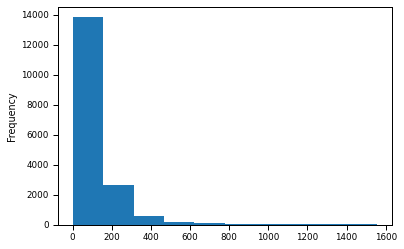

In [ ]:
# Distribution of Word Count per message
data_length.plot.hist(grid=False)

<Figure size 720x1080 with 0 Axes>

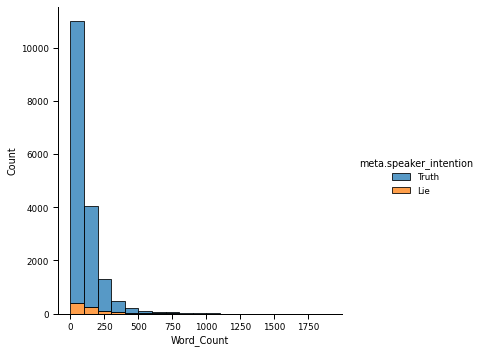

In [ ]:
#Word Count of Text by Speaker's perception
data['Word_Count'] = data['text'].apply(lambda sent : len(sent))
plt.figure(figsize=(10, 15))
sns.displot(data.dropna(axis=0, how='all'), x='Word_Count', hue='meta.speaker_intention', multiple='stack', bins=[i for i in range(0, 2000, 100)])
plt.show()

<Figure size 720x1080 with 0 Axes>

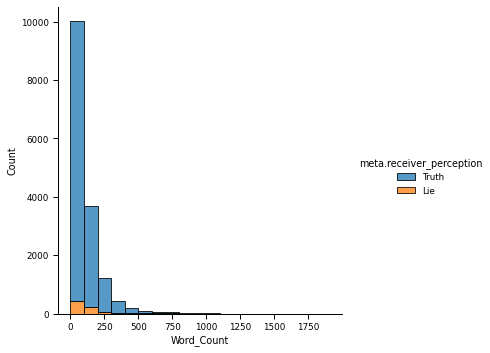

In [ ]:
#Word Count of Text by Receiver's perception
data['Word_Count'] = data['text'].apply(lambda sent : len(sent))
plt.figure(figsize=(10, 15))
sns.displot(data.dropna(axis=0, how='all'), x='Word_Count', hue='meta.receiver_perception', multiple='stack', bins=[i for i in range(0, 2000, 100)])
plt.show()